In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Support Vector Machines
* linear and nonlinear classfication, regression, and outlier detection
* Good in small or medium sized datasets with complex features

## Linear SVM Classification

* SVMs try to fit the data well, but stay as far from closest training instances as possible
   * For generalization purposes
* You will see a line in the middle with parallel dashed lines on either side
  * aka, large margin classification

![image.png](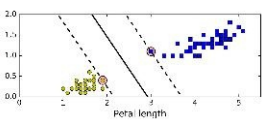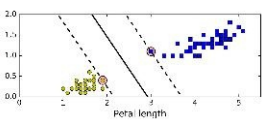)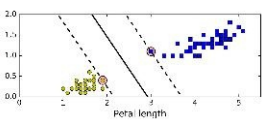

* New training instances "off the street" or outside of the lines will not change the fit.
    * The points on the line are called the support vectors
* Also note that scaling is really important with SVMs

### Soft Margin Classification
* When we strictly impose all instances must be off street, this is "hard margin classification"
  * This can cause some poor fits when there are outliers so it is better to use a more flexible model
  * Could cause some really narrow streets that won't generalize as well

On the other hand
* Soft margin classification limits margin violations (where instances are in middle or wrong side) and allows us to have a larger street width


In [28]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [29]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)
print(y)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_csv", LinearSVC(C = 1, loss = "hinge"))  # When C is larger, the street becomes more narrow (1 vs 100 maybe)
])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [30]:
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

#### Visualizations

In [31]:
### Visualizations ###
import seaborn as sns
import plotly as plotly
import plotly.express as px

In [32]:
fig = px.scatter(x = X[:, 0], y = X[:, 1], color = y,
                 labels = {'x' : 'Petal length', 'y' : 'Petal width'},
                 )

fig.show()

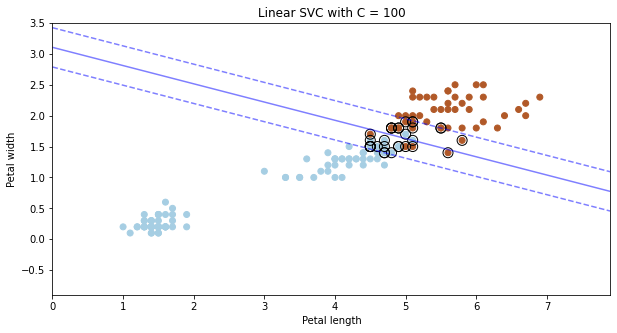

In [33]:
from sklearn.inspection import DecisionBoundaryDisplay

decision_function = svm_clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize = (10,5))

plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.Paired)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
      svm_clf,
      X,
      ax=ax,
      grid_resolution=50,
      plot_method="contour",
      colors="b",
      levels=[-1, 0, 1],
      alpha=0.5,
      linestyles=["--", "-", "--"],
  )
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth = 1, 
    facecolors = "none", 
    edgecolors = "k"
)

plt.title('Linear SVC with C = 100')
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



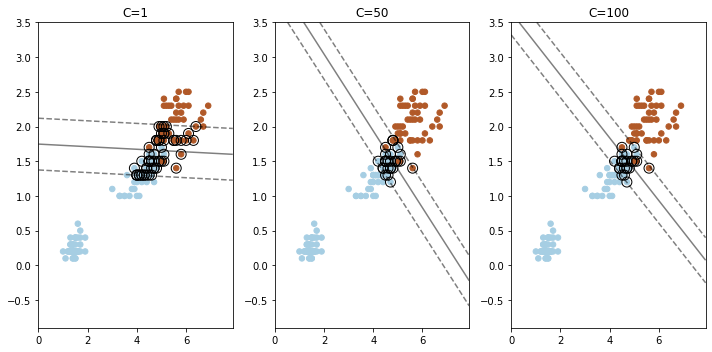

In [34]:

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 50, 100]):
  #plot for each C value above
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

## Nonlinear SVM Classification

* With nonlinear datsets (most), you can add polynomial features


In [35]:
# Polynomial transformer pipeline
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss = "hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [36]:
#Clearly this is not linearly separable
px.scatter(x = X[:, 0] , y = X[:, 1], color = y)

In [37]:
#Some difficult visual, figure 5-6

# decision_function = polynomial_svm_clf.decision_function(X)
# plt.gca()
# DecisionBoundaryDisplay.from_estimator(
#       polynomial_svm_clf,
#       X,
#       ax=ax,
#       grid_resolution=50,
#       plot_method="contour",
#       colors="b",
#       levels=[-1, 0, 1],
#       alpha=0.5,
#       linestyles=["--", "-", "--"],
#   )
# plt.show()

### Polynomial Kernel

* While making polynomial features can work, it struggles with high degrees, and can't deal with complex datasets

* The kernel trick lets us add these features, without actually having to calculate them and add them to the data

In [38]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5)) 
    #coef0 affects how much model is affected by high-degree polynomials vs low
    # degree is how complex
])
poly_kernel_svm_clf.fit(X, y) #3 degree polynomial kernlel

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### Similarity Features
* Another technique for nonlinear problems is to add features computed with a similarity function
  * Calculates how much an instance resembles a "landmark"
  * example similarity function : Gaussian Radial Basis Function (RBF) with *y* = 0.3

Equation is noted as:

exp (-*y*|| x - *l* ||^2)

In [39]:
#So for example of instance 
x_1 = -1 
#with landmarks
x11 = -2
x12 = 1

distances = (abs(x11 - x_1), abs(x12 - x_1))
distances

(1, 2)

In [40]:
#So the new features are
x_2 = np.exp(-0.3 * distances[0]**2)
x_3 = np.exp(-0.3 * distances[1]**2)
x_2, x_3

(0.7408182206817179, 0.30119421191220214)

In [41]:
#visual

### Gaussian RBF Kernel

In [42]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X, y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [43]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

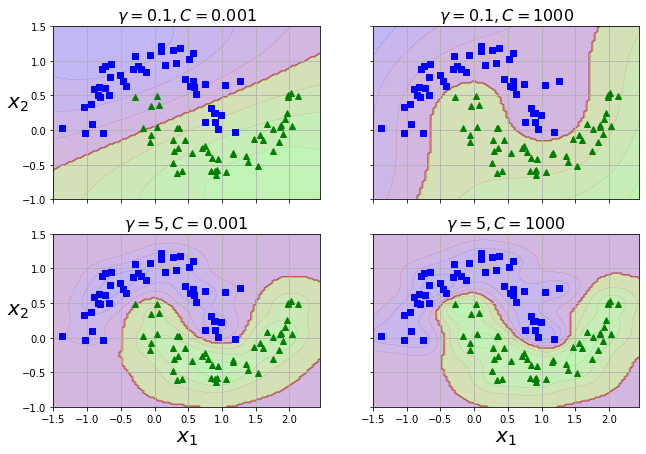

In [44]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

* gamma is the aforementioned 'y'. It acts like C in many ways when tuning
    * When model is overfitting, reduce it, when underfitting, increase it
* Increasing gamma makes bell-shaped plots of the gaussian narrower, meaning that each point has less influence.
   * Straightens out the decision boundary by basically giving each point less influence to a smaller part of the decision boundary.
     


In [45]:
#Other kernels can be used for specific instances, but generally we'll use linear and the gaussian/polynomial
  #LinearSVC on the otherhand, does not support kernels. It's training time complexity is linear not exponential

#SVC class on other hand has time complexity of O(m^2 x n) or even cued. 
    #Features not the issue, but with many training instances it gets very slow
    #good with sparse features though

## SVM Regression

*To make them work for regression, we reverse objective
   * Rather than fit largest possible street between two classes, we try to fit as many instances ON the street while limiting margin violations
* Width of street controlled by hyperparamter (backwards 3) e

In [62]:
#some random data
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [63]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

#### Visualization

In [64]:


svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

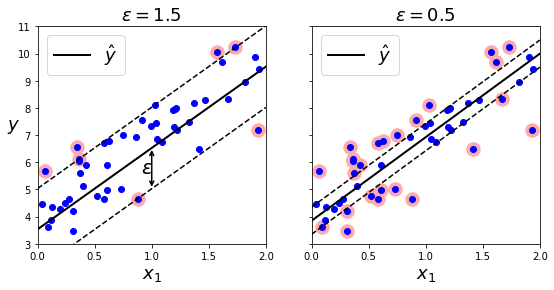

In [66]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1) #generate lots of values
    y_pred = svm_reg.predict(x1s) #make predictions
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$") # plot center of street
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--") # plot epsilon transformed lines
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA') # highlight the support vectors / ones outside of epsilon range
      #s is the size of the circle
    plt.scatter(X, y, c = 'b')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True) #create two subplots
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11]) #plot svm regression on first
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate( #add arrow
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Adding more training instances within margin does not affect the predictions, so model is e-insensitive

### With polynomial kernel

In [67]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

Code for a simple SVR

In [68]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

#### Visualization

In [69]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

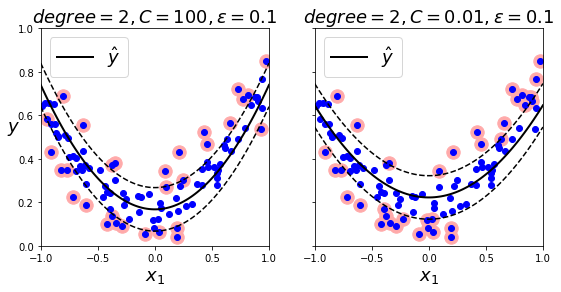

In [71]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

### Under the Hood

* Compared to previous models, no bias feature of 1 is added to input feature vectors


#### Decision Function and Predictions
* Linear SVM classifier is simply w.T * x + b
    * If value is < 0, 0. otherwise 1
* Image below explained:
  * X, y are the length and width
  * the height is the decision function
  * The point where decision function is 0 (where the original plane lies) is the decision boundary (thick line)
  * Dashed lines are equal to 1 or -1
      * goal is to maximize this margin as much as possible while avoiding or limiting margin violations
    

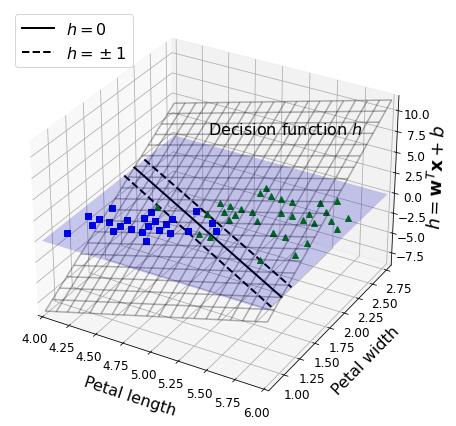

* The slope of the decision function is the norm of the vector w : || w ||
   * dividing slope by 2, the decision function +- 1 is going to be twice as far away as illustrated below
* Hence, smaller w, larger the margin

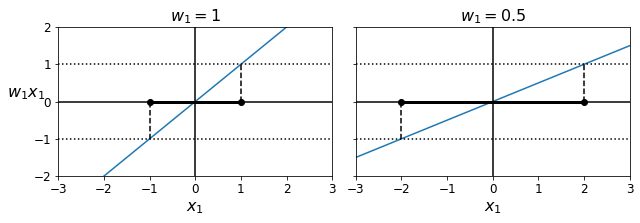

* With hard margin, it is easy to formulate
   * minimize 1/2 || w || ^2 or 1/2 wTw - adding half makes it differentiable at w = 0. Optimization algos work better this way

* For the softmax, we introduce a slack variable which measures how much ith instance can violate the margin
   * We want to minimize slack and margin violations. And make 1/2wTw small to increase the margin
   * The C hyperparameter helps us define the tradeoff between these two